In [1]:
# Re-importing necessary libraries after environment reset
import pandas as pd
import numpy as np

# Creating a synthetic dataset based on the outlined implementation for evaluation of personalized discounts

# Parameters for synthetic data generation
num_customers = 500  # Number of unique customers
num_transactions = 5000  # Total number of transactions
num_items = 300  # Number of unique items

# Generate random data for transactions
np.random.seed(42)  # For reproducibility
customer_ids = np.random.randint(1, num_customers + 1, size=num_transactions)
item_ids = np.random.randint(1, num_items + 1, size=num_transactions)
purchase_amounts = np.round(np.random.uniform(5.0, 200.0, size=num_transactions), 2)
transaction_dates = pd.date_range(start='2023-01-01', end='2024-12-31', periods=num_transactions)

# Simulate discount offers (randomly assigned to 30% of transactions)
discount_offered = np.random.choice([0, 1], size=num_transactions, p=[0.7, 0.3])
discount_amount = np.where(discount_offered == 1, np.round(np.random.uniform(5.0, 50.0, size=num_transactions), 2), 0.0)

# Create a DataFrame
transaction_data = pd.DataFrame({
    'transaction_id': np.arange(1, num_transactions + 1),
    'customer_id': customer_ids,
    'item_id': item_ids,
    'purchase_amount': purchase_amounts,
    'transaction_date': transaction_dates,
    'discount_offered': discount_offered,
    'discount_amount': discount_amount
})

# Save the dataset to a CSV file
csv_file_path = '/mnt/data/transactions_data.csv'
transaction_data.to_csv(csv_file_path, index=False)

csv_file_path


'/mnt/data/transactions_data.csv'

In [3]:
# Step 1: Load Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind

# Enable inline plotting
%matplotlib inline

# Step 2: Load Transaction Data (Assuming it's in CSV format)
def load_transaction_data(file_path):
    # Load the transaction data including discounts and customer info
    return pd.read_csv(file_path)

# Example Usage
transaction_data = load_transaction_data('/mnt/data/transactions_data.csv')  # Use your file path

# Display first few rows to understand the structure
transaction_data.head()


,transaction_id,customer_id,item_id,purchase_amount,transaction_date,discount_offered,discount_amount
0,1,103,215,119.19,2023-01-01 00:00:00.000000000,0,0.0
1,2,436,120,120.31,2023-01-01 03:30:16.923384676,0,0.0
2,3,349,55,145.24,2023-01-01 07:00:33.846769353,0,0.0
3,4,271,27,150.32,2023-01-01 10:30:50.770154030,0,0.0
4,5,107,118,105.32,2023-01-01 14:01:07.693538707,0,0.0


In [ ]:
#Step 3: Data Preprocessing

In [4]:
# Step 3: Preprocess Data (Handling missing values, standardizing formats, etc.)
def preprocess_data(data):
    # Handle missing values
    data = data.dropna()
    
    # Convert categorical data to numerical if needed (e.g., categorical encoding)
    # Example: Convert 'discount_type' to numerical if it's categorical
    if 'discount_type' in data.columns:
        data['discount_type'] = data['discount_type'].astype('category').cat.codes
    
    # Create a 'pre_discount' and 'post_discount' flags based on transaction date
    data['transaction_date'] = pd.to_datetime(data['transaction_date'])
    
    # Assume we are evaluating a particular discount campaign within a date range
    discount_start_date = '2024-01-01'
    discount_end_date = '2024-03-01'
    
    # Flagging pre and post discount transactions
    data['pre_discount'] = data['transaction_date'] < pd.to_datetime(discount_start_date)
    data['post_discount'] = (data['transaction_date'] >= pd.to_datetime(discount_start_date)) & \
                            (data['transaction_date'] <= pd.to_datetime(discount_end_date))
    
    return data

# Example Usage
processed_data = preprocess_data(transaction_data)
processed_data.head()


,transaction_id,customer_id,item_id,purchase_amount,transaction_date,discount_offered,discount_amount,pre_discount,post_discount
0,1,103,215,119.19,2023-01-01 00:00:00.000000000,0,0.0,True,False
1,2,436,120,120.31,2023-01-01 03:30:16.923384676,0,0.0,True,False
2,3,349,55,145.24,2023-01-01 07:00:33.846769353,0,0.0,True,False
3,4,271,27,150.32,2023-01-01 10:30:50.770154030,0,0.0,True,False
4,5,107,118,105.32,2023-01-01 14:01:07.693538707,0,0.0,True,False


In [ ]:
#Step 4: Customer Segmentation

In [5]:
# Step 4: Customer Segmentation (Using K-Means for simplicity)
def segment_customers(data, n_clusters=5):
    # Segmentation based on Recency, Frequency, and Monetary Value (RFM)
    rfm_data = data.groupby('customer_id').agg({
        'transaction_date': lambda x: (pd.to_datetime('2024-12-31') - x.max()).days,
        'transaction_id': 'count',  # Frequency of transactions
        'purchase_amount': 'sum'    # Total monetary value
    }).rename(columns={'transaction_date': 'Recency',
                       'transaction_id': 'Frequency',
                       'purchase_amount': 'MonetaryValue'}).reset_index()
    
    # Standardize data for clustering
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_rfm = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'MonetaryValue']])
    
    # KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    rfm_data['Segment'] = kmeans.fit_predict(scaled_rfm)
    
    return rfm_data

# Example Usage
segmented_customers = segment_customers(processed_data)
segmented_customers.head()


C:\Users\DELL\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,customer_id,Recency,Frequency,MonetaryValue,Segment
0,1,9,14,1578.41,2
1,2,59,10,1038.62,0
2,3,181,9,1062.54,4
3,4,110,10,954.92,4
4,5,25,15,1351.25,2


In [ ]:
#Step 5: Behavior Analysis (Pre- and Post-Discount)

In [6]:
# Step 5: Analyze Customer Behavior Pre and Post Discounts
def analyze_behavior(data):
    # Calculate key metrics for pre and post discount
    metrics = data.groupby(['pre_discount', 'post_discount']).agg({
        'customer_id': 'nunique',  # Unique customers
        'transaction_id': 'count',  # Total transactions
        'purchase_amount': 'mean'   # Average order value (AOV)
    }).reset_index()
    
    return metrics

# Example Usage
behavior_analysis = analyze_behavior(processed_data)
print("Behavior Analysis Pre and Post Discounts:")
print(behavior_analysis)


Behavior Analysis Pre and Post Discounts:
   pre_discount  post_discount  customer_id  transaction_id  purchase_amount
0         False          False          491            2089       102.421024
1         False           True          290             411        98.283917
2          True          False          496            2500       103.890384


In [ ]:
#Step 6: Statistical Testing

In [7]:
# Step 6: Statistical Testing (e.g., A/B Testing)
def perform_statistical_test(data):
    # Separate data into pre and post discount
    pre_discount_data = data[data['pre_discount']]['purchase_amount']
    post_discount_data = data[data['post_discount']]['purchase_amount']
    
    # Perform T-Test to compare AOV before and after discounts
    t_stat, p_value = ttest_ind(pre_discount_data, post_discount_data, equal_var=False)
    
    return t_stat, p_value

# Example Usage
t_stat, p_value = perform_statistical_test(processed_data)
print(f"T-Test Statistics: {t_stat}, P-Value: {p_value}")


T-Test Statistics: 1.8804570338142006, P-Value: 0.060569278248660374


In [ ]:
#Step 7: Visualization

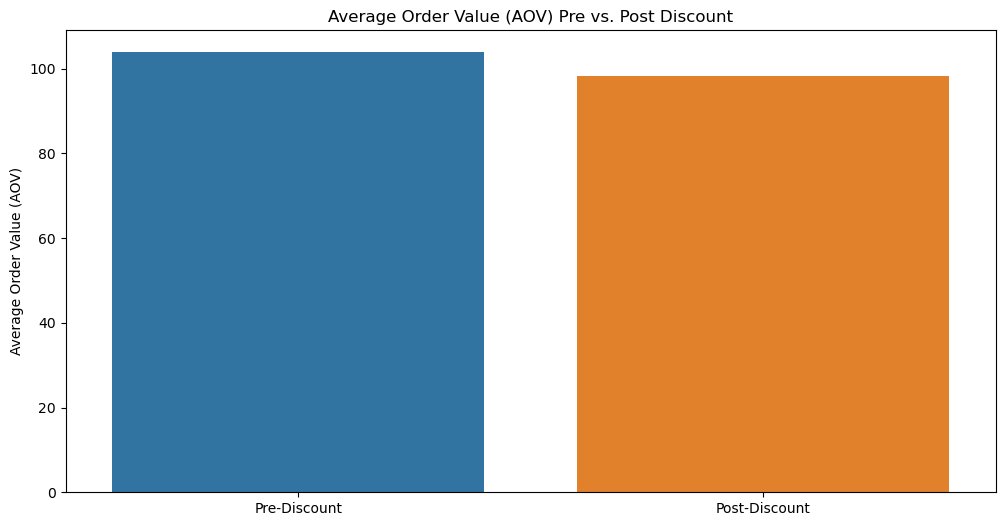

In [8]:
# Step 7: Visualization of Results
def visualize_impact(data):
    # Visualize changes in AOV pre and post discount
    plt.figure(figsize=(12, 6))
    sns.barplot(x=['Pre-Discount', 'Post-Discount'], 
                y=[data[data['pre_discount']]['purchase_amount'].mean(), 
                   data[data['post_discount']]['purchase_amount'].mean()])
    
    plt.title('Average Order Value (AOV) Pre vs. Post Discount')
    plt.ylabel('Average Order Value (AOV)')
    plt.show()

# Example Usage
visualize_impact(processed_data)
